# Upranking windows with "active" time-courses

In [1]:
%qtconsole


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# load packages
import pandas as pd
import statsmodels.tsa.stattools as stats
import statsmodels.graphics.tsaplots as sg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import sys
from datetime import datetime
import numpy as np

import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

sys.path.append("../pipelines")
import Pipelines as tdw
data_folder = "/projects/p20519/roller_output/optimizing_window_size/RandomForest/insilico_size10_1/"

output_path = "/home/jjw036/Roller/insilico_size10_1"

current_time = datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

data_folder = "../output/insilico_size10_1"
file_path = "../data/dream4/insilico_size10_1_timeseries.tsv"
run_params = {'data_folder': data_folder,
              'file_path':file_path,
              'td_window':10,
              'min_lag':1,
              'max_lag':3,
              'n_trees':10,
              'permutation_n':10,
              'lag_method':'mean_mean',
              'calc_mse':False,
              'bootstrap_n':1000,
              'n_trials':1,
              'run_time':current_time,
              'sort_by':'rank',
              'iterating_param':'td_window',
              }
            

roc,pr, tdr = tdw.get_td_stats(**run_params)

Running permutation on window 3...
Running permutation on window 4...
Running permutation on window 5...
Running permutation on window 6...
Running permutation on window 7...
Running permutation on window 8...
Running permutation on window 9...
Running permutation on window 10...
Running permutation on window 11...
Compiling all model edges...
[DONE]
Lumping edges...
[DONE]

/Users/jjw036/Roller/Swing/Swing.py:564: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  current_df.sort(['adj_imp'], ascending=False, inplace=True)
/Users/jjw036/Roller/Swing/Swing.py:690: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=True, inplace=True)



Calculating rank edge importance...
[DONE]
90
Scoring model...
[DONE]
0.856
0.464115412227


In [3]:
## Loading baseline SWING results (uniform windowing)
edges = pd.read_csv("../data/dream4/insilico_size10_1_goldstandard.tsv",sep="\t",header=None)
edges = edges[edges[2] > 0]
edges=edges[edges.columns[0:2]]
edges = [tuple(x) for x in edges.values]

tdr.full_edge_list
#tdr.edge_dict
final_edge_list = tdr.make_sort_df(tdr.edge_dict, sort_by=run_params['sort_by'])
final_edge_list['Correct'] = final_edge_list['regulator-target'].isin(edges)
pd.set_option('display.height', 500)
final_edge_list

Calculating rank edge importance...
[DONE]
height has been deprecated.



/Users/jjw036/Roller/Swing/Swing.py:690: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=True, inplace=True)


,regulator-target,rank_importance,Correct
0,"(G8, G6)",58.66667,True
1,"(G5, G1)",68.11111,False
2,"(G1, G5)",69.85185,True
3,"(G7, G3)",73.22222,True
4,"(G9, G10)",74.70370,True
5,"(G7, G2)",80.25926,False
6,"(G2, G6)",85.77778,False
7,"(G8, G2)",87.29630,True
8,"(G9, G3)",88.66667,False
9,"(G6, G8)",95.33333,False


In [4]:
## Identifying edges that are poorly detected
#Edge G2->G8, and G7->G4 

def get_experiment_list(filename):
    # load files
    timecourse = pd.read_csv(filename, sep="\t")
    # divide into list of dataframes
    experiments = []
    for i in range(0,85,21):
        experiments.append(timecourse.ix[i:i+20])
    
    #reformat
    for idx,exp in enumerate(experiments):
        exp = exp.set_index('Time')
        experiments[idx]=exp
    return(experiments)

experiments=get_experiment_list("../data/dream4/insilico_size10_1_timeseries.tsv")
# formatting matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


/Users/jjw036/anaconda/lib/python3.4/site-packages/pandas/tools/plotting.py:929: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


/Users/jjw036/anaconda/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


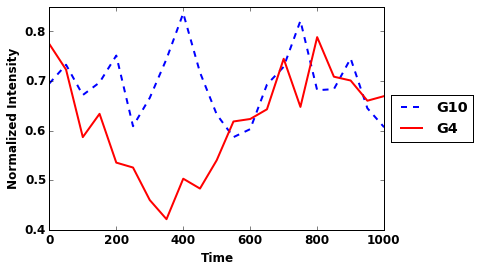

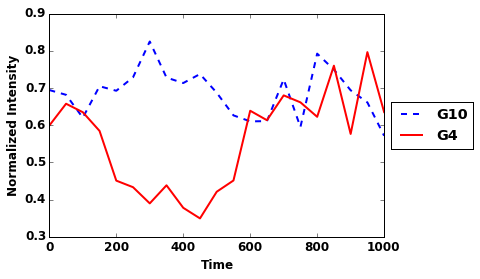

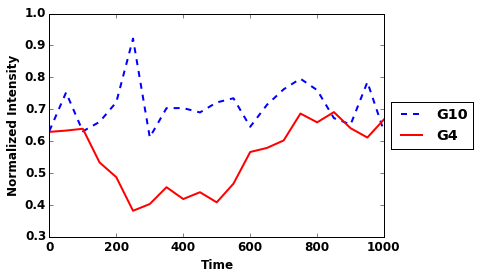

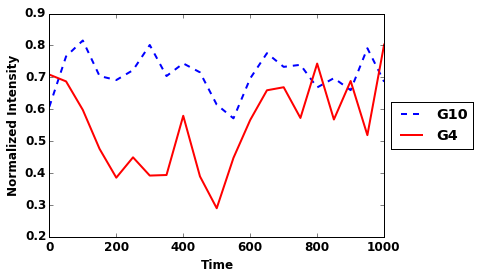

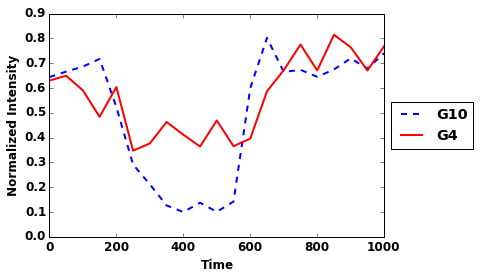

In [5]:

# plot time series for an interaction
fig = plt.figure(figsize=(8,15))

ax1 = experiments[0][['G10', 'G4']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax1.set_ylabel('Normalized Intensity', fontweight='bold')
ax1.set_xlabel('Time',fontweight='bold')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = experiments[1][['G10', 'G4']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax2.set_ylabel('Normalized Intensity', fontweight='bold')
ax2.set_xlabel('Time',fontweight='bold')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax3 = experiments[2][['G10', 'G4']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax3.set_ylabel('Normalized Intensity', fontweight='bold')
ax3.set_xlabel('Time',fontweight='bold')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax4 = experiments[3][['G10', 'G4']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax4.set_ylabel('Normalized Intensity', fontweight='bold')
ax4.set_xlabel('Time',fontweight='bold')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax5 = experiments[4][['G10', 'G4']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax5.set_ylabel('Normalized Intensity', fontweight='bold')
ax5.set_xlabel('Time',fontweight='bold')
ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
## Dissecting window results
for target_window in tdr.window_list:

    current_df = target_window.make_edge_table(calc_mse=False)
    current_df['adj_imp'] = np.abs(current_df['Importance']*(1-current_df['p_value']))
    current_df.sort(['adj_imp'], ascending=False,inplace=True)
    print(current_df[(current_df['Parent']=='G10') & (current_df['Child']=='G4')])

    Parent Child  Importance  P_window  C_window  p_value  adj_imp
119    G10    G4     0.04600         2         3  0.68349  0.01456
109    G10    G4     0.00842         1         3  0.20241  0.00671
99     G10    G4     0.00995         0         3  0.40598  0.00591
    Parent Child  Importance  P_window  C_window  p_value  adj_imp
119    G10    G4     0.05501         3         4  0.50652  0.02715
99     G10    G4     0.01474         1         4  0.50706  0.00727
109    G10    G4     0.00816         2         4  0.20475  0.00649
    Parent Child  Importance  P_window  C_window  p_value  adj_imp
109    G10    G4     0.04693         3         5  0.48631  0.02411
99     G10    G4     0.02317         2         5  0.84457  0.00360
119    G10    G4     0.00257         4         5  0.27744  0.00185
    Parent Child  Importance  P_window  C_window  p_value  adj_imp
99     G10    G4     0.00989         3         6  0.35145  0.00641
109    G10    G4     0.00825         4         6  0.51851  0.0

/Users/jjw036/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [7]:
## Heavily weighting window
#tdr.compile_roller_edges2(self_edges=False, calc_mse = False)
#tdr.make_static_edge_dict(true_edges, self_edges=False,lag_method= run_params['lag_method'])
roc,pr, tdr = tdw.get_td_stats2(**run_params)

Running permutation on window 3...
Running permutation on window 4...
Running permutation on window 5...
Running permutation on window 6...
Running permutation on window 7...
Running permutation on window 8...
Running permutation on window 9...
Running permutation on window 10...
Running permutation on window 11...
Compiling all model edges...
[DONE]
Lumping edges...
[DONE]

/Users/jjw036/Roller/Swing/Swing.py:607: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  current_df.sort(['adj_imp'], ascending=False, inplace=True)
/Users/jjw036/Roller/Swing/Swing.py:690: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=True, inplace=True)



Calculating rank edge importance...
[DONE]
90
Scoring model...
[DONE]
0.853333333333
0.484950043028


In [8]:
edge_dict = tdr.make_sort_df(tdr.edge_dict, run_params['sort_by'])
tdr.score(edge_dict)

Calculating rank edge importance...
[DONE]
Scoring model...
[DONE]


/Users/jjw036/Roller/Swing/Swing.py:690: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=True, inplace=True)


({'auroc': array([ 0.        ,  0.        ,  0.00177778,  0.00177778,  0.00177778,
          0.00533333,  0.00888889,  0.01244444,  0.01244444,  0.01244444,
          0.01777778,  0.02311111,  0.02844444,  0.02844444,  0.03466667,
          0.03466667,  0.04177778,  0.04177778,  0.04977778,  0.05777778,
          0.06577778,  0.07377778,  0.07377778,  0.07377778,  0.08355556,
          0.09333333,  0.09333333,  0.104     ,  0.11466667,  0.12533333,
          0.136     ,  0.14666667,  0.15733333,  0.168     ,  0.17866667,
          0.18933333,  0.2       ,  0.21066667,  0.21066667,  0.22222222,
          0.23377778,  0.24533333,  0.25688889,  0.25688889,  0.26933333,
          0.28177778,  0.29422222,  0.30666667,  0.30666667,  0.32      ,
          0.33333333,  0.34666667,  0.36      ,  0.37333333,  0.38666667,
          0.4       ,  0.41333333,  0.42666667,  0.44      ,  0.45333333,
          0.46666667,  0.48      ,  0.49333333,  0.50666667,  0.52      ,
          0.53333333,  0.5466

In [9]:
## Something is wrong here.
edge_dict = tdr.make_sort_df(tdr.edge_dict, run_params['sort_by'])
edge_dict['Correct'] = edge_dict['regulator-target'].isin(edges)
pd.set_option('display.height', 500)
edge_dict

Calculating rank edge importance...
[DONE]
height has been deprecated.



/Users/jjw036/Roller/Swing/Swing.py:690: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=True, inplace=True)


,regulator-target,rank_importance,Correct
0,"(G8, G6)",50.92593,True
1,"(G1, G5)",60.33333,True
2,"(G5, G1)",74.85185,False
3,"(G7, G3)",80.22222,True
4,"(G9, G10)",87.51852,True
5,"(G7, G2)",88.11111,False
6,"(G2, G6)",93.62963,False
7,"(G9, G3)",94.92593,False
8,"(G7, G4)",101.03704,True
9,"(G8, G2)",106.18519,True


/Users/jjw036/anaconda/lib/python3.4/site-packages/pandas/tools/plotting.py:929: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


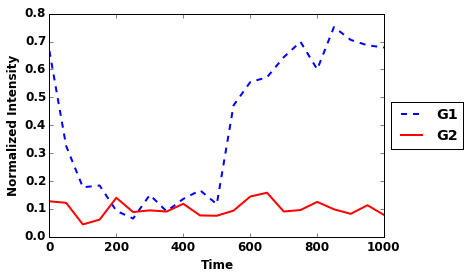

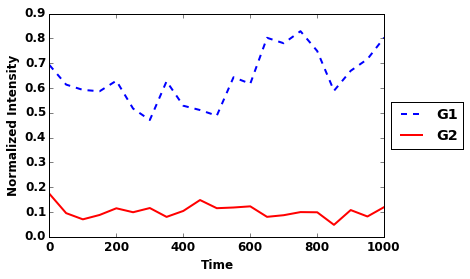

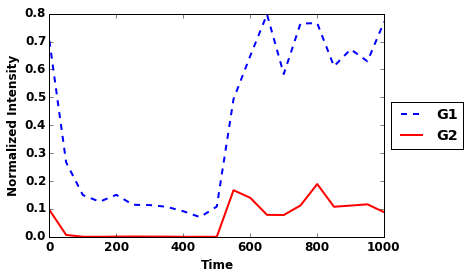

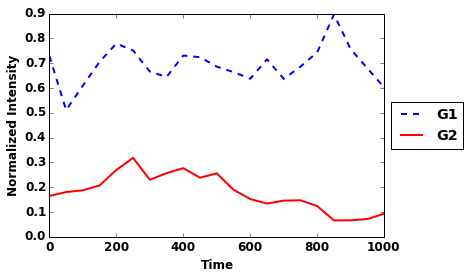

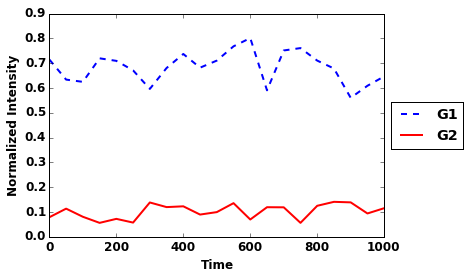

In [10]:

# plot time series for an interaction
fig = plt.figure(figsize=(8,15))

ax1 = experiments[0][['G1', 'G2']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax1.set_ylabel('Normalized Intensity', fontweight='bold')
ax1.set_xlabel('Time',fontweight='bold')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = experiments[1][['G1', 'G2']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax2.set_ylabel('Normalized Intensity', fontweight='bold')
ax2.set_xlabel('Time',fontweight='bold')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax3 = experiments[2][['G1', 'G2']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax3.set_ylabel('Normalized Intensity', fontweight='bold')
ax3.set_xlabel('Time',fontweight='bold')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax4 = experiments[3][['G1', 'G2']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax4.set_ylabel('Normalized Intensity', fontweight='bold')
ax4.set_xlabel('Time',fontweight='bold')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax5 = experiments[4][['G1', 'G2']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax5.set_ylabel('Normalized Intensity', fontweight='bold')
ax5.set_xlabel('Time',fontweight='bold')
ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5))